# Load Data

In [1]:
import pandas as pd

eicu = pd.read_csv("../data/one_hot_age_gender_region_eicu_data.csv")
print(eicu.shape)
print("Total regions: ", len(eicu.regionid.unique()))
print("Total drugs: ", len(eicu.columns[16:]))
print("Total features: ", len(eicu.columns[7:]))
eicu.head()

(73004, 1427)
Total regions:  4
Total drugs:  1411
Total features:  1420


,patientunitstayid,hospitalid,regionid,Death,unitdischargeoffset,ventilation,sepsis,Gender,< 30,30 - 39,...,traMADol,traMADol 50 MG TAB,traZODone,vancomycin,vancomycin hcl 1000 mg iv solr,vancomycin in D5W (VANCOCIN) ivpb 1 g,warfarin,warfarin sodium (COUMADIN) tab 5 mg,zolpiDEM 5 MG TAB,zolpidem
0,141168.0,59.0,0.0,1.0,3596.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141194.0,73.0,0.0,0.0,4813.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,141233.0,73.0,0.0,0.0,15685.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,141244.0,73.0,0.0,0.0,3835.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,141265.0,63.0,0.0,0.0,6068.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
eicu.columns.to_list()

['patientunitstayid',
 'hospitalid',
 'regionid',
 'Death',
 'unitdischargeoffset',
 'ventilation',
 'sepsis',
 'Gender',
 '< 30',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 '80 - 89',
 '> 89',
 '.5 ML VIAL : PNEUMOCOCCAL VAC POLYVALENT 25 MCG/0.5ML IJ INJ',
 '0.4 ML SYRINGE : ENOXAPARIN SODIUM 40 MG/0.4ML SC SOLN',
 '0.4 ml syringe : enoxaparin sodium 40 mg/0.4ml sc soln',
 '0.5 ML - INFLUENZA VAC SPLIT QUAD 0.5 ML IM SUSP',
 '0.5 ML PLAS CONT : ALBUTEROL SULFATE (5 MG/ML) 0.5% IN NEBU',
 '0.9%  NaCl infusion',
 '0.9%NaCl 1,000 mL',
 '1 EACH PACKAGE CUSTOM NDC : METOPROLOL TARTRATE 12.5 MG PO TABS (HALF-TAB)',
 '1 EACH VIAL : ALTEPLASE 2 MG IJ SOLR',
 '1 EACH VIAL : CEFEPIME HCL 1 GM IJ SOLR',
 '1 EACH VIAL : CEFTRIAXONE SODIUM 1 G IJ SOLR',
 '1 ML  -  DIPHENHYDRAMINE HCL 50 MG/ML IJ SOLN',
 '1 ML  -  HALOPERIDOL LACTATE 5 MG/ML IJ SOLN',
 '1 ML  -  HEPARIN SODIUM (PORCINE) 5000 UNIT/ML IJ SOLN',
 '1 ML  -  HYDRALAZINE HCL 20 MG/ML IJ SOLN',
 '1 ML  -  HYDROMORPHONE 

# Visualization

In [3]:
def calculate_death_alive_count(label):
    death_patients_count, alive_patients_count = [], []
    for region_id in eicu.regionid.unique():
        region_df = eicu[eicu["regionid"] == region_id]
        alive_patients_count.append(len(region_df[region_df[label] == 0]))
        death_patients_count.append(len(region_df[region_df[label] == 1]))
    return death_patients_count, alive_patients_count

## Ventilation

Use ventilation patients:  [4762, 6289, 3766, 2549]
No ventilation patients:  [21889, 19569, 10209, 3971]


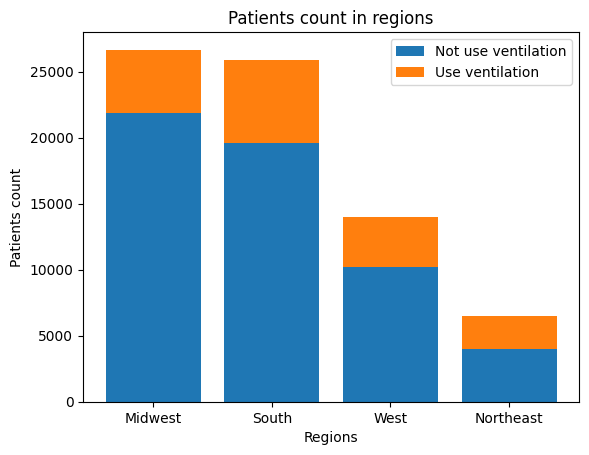

In [4]:
import matplotlib.pyplot as plt

use_ventilation, no_ventilation = calculate_death_alive_count("ventilation")
print("Use ventilation patients: ", use_ventilation)
print("No ventilation patients: ", no_ventilation)

region_dict = {0: 'Midwest', 1: 'South', 2: 'West', 3: 'Northeast'}
region_labels = [region_dict[x] for x in eicu.regionid.unique()]

plt.figure()
plt.title("Patients count in regions")
plt.bar(region_labels, no_ventilation, label='Not use ventilation')
plt.bar(region_labels, use_ventilation, bottom=no_ventilation, label='Use ventilation')
plt.legend()
plt.xlabel("Regions")
plt.ylabel("Patients count")
plt.show()

Has sepsis patients:  [2003, 1921, 1984, 1213]
No sepsis patients:  [24648, 23937, 11991, 5307]


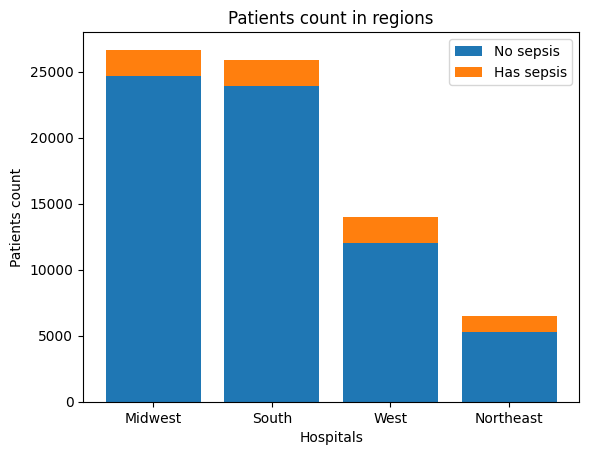

In [5]:
import matplotlib.pyplot as plt

has_sepsis, no_sepsis = calculate_death_alive_count("sepsis")
print("Has sepsis patients: ", has_sepsis)
print("No sepsis patients: ", no_sepsis)

plt.figure()
plt.title("Patients count in regions")
plt.bar(region_labels, no_sepsis, label='No sepsis')
plt.bar(region_labels, has_sepsis, bottom=no_sepsis, label='Has sepsis')
plt.legend()
plt.xlabel("Hospitals")
plt.ylabel("Patients count")
plt.show()

Death patients:  [1393, 1743, 1058, 542]
Alive patients:  [25258, 24115, 12917, 5978]


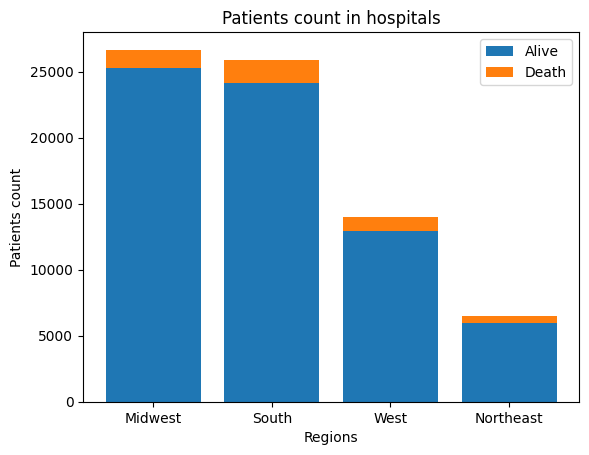

In [6]:
import matplotlib.pyplot as plt

death, alive = calculate_death_alive_count("Death")
print("Death patients: ", death)
print("Alive patients: ", alive)

plt.figure()
plt.title("Patients count in hospitals")
plt.bar(region_labels, alive, label='Alive')
plt.bar(region_labels, death, bottom=alive, label='Death')
plt.legend()
plt.xlabel("Regions")
plt.ylabel("Patients count")
plt.show()

# Covariate Shift Analysis

We have covariate shift problems in the drugs taken by patients

In [7]:
import numpy as np

selected_ids = np.random.choice(np.arange(len(eicu)), 7500, replace=False)
ids = eicu.iloc[selected_ids, 2].to_numpy()
x = eicu.iloc[selected_ids, 16:].to_numpy()

print(x)

# random_ids = np.random.choice(np.arange(len(x)), 7500, replace=False)
# x = x[random_ids]
# ids = ids[random_ids]

print(ids)
print(x.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 1. 1. ... 2. 2. 2.]
(7500, 1411)


In [16]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns


def draw_umap(n_neighbors, min_dist, target=None):

    print("n_neighbors: {}, min_dist: {}".format(n_neighbors, min_dist))

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(8, 6))

    palette = ["#fb9a99", "#1f78b4", "#b2df8a", "#fdbf6f"]
    colors = sns.color_palette(palette, n_colors=15)
    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        print("id: {} hospital id: {}".format(id, hospital_id))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]
        scatter_rows = np.float32(scatter_rows[:, :2])

        if target is not None and float(target) != hospital_id:
            color = "#e1e1e1"
        else:
            color = colors[id]

        plot = plt.scatter(
            scatter_rows[:, 0], scatter_rows[:, 1], label=region_dict[hospital_id], color=color, alpha=0.1)

    plt.title("UMAP Analysis for eICU Regions")
    plt.legend(loc="best", title="Region id", fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

    return final_np


n_neighbors: 5, min_dist: 0.5
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


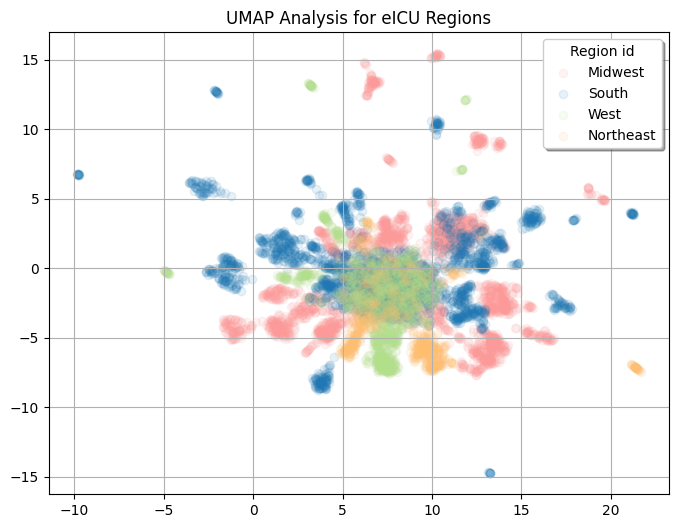

In [17]:
final_np = draw_umap(5, 0.5)

In [18]:
from sklearn.metrics.pairwise import pairwise_distances

avg_distance_dict = {}
idx = 0

for id in np.unique(ids):

    cluster1 = final_np[final_np[:,2] == id]
    cluster1 = cluster1[:,[0,1]]

    for neighbour_id in np.unique(ids):
        
        if neighbour_id == id:
            continue

        if str(int(id)) + " " + str(int(neighbour_id)) in avg_distance_dict:
            continue

        if str(int(neighbour_id)) + " " + str(int(id)) in avg_distance_dict:
            continue

        cluster2 = final_np[final_np[:,2] == neighbour_id]
        cluster2 = cluster2[:,[0,1]]

        distance = pairwise_distances(cluster1, cluster2)
        distances = distance.reshape(-1)
        avg_distances = np.mean(distances)
        avg_distances = avg_distances.item()
        avg_distance_dict[region_dict[id] + " - " + region_dict[neighbour_id]] = avg_distances
        idx += 1

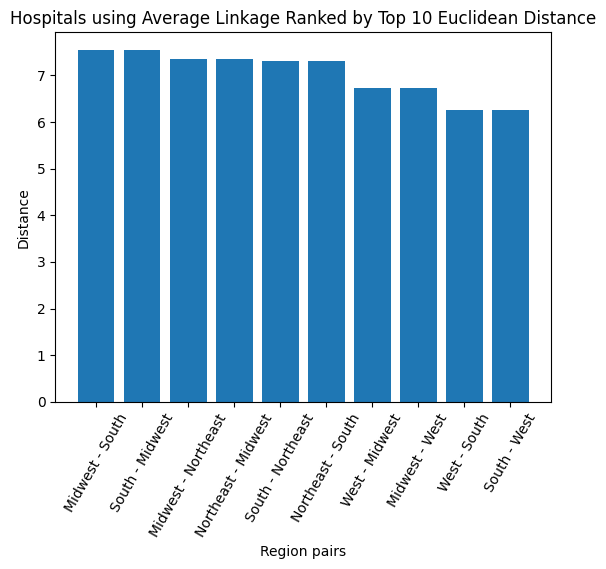

In [20]:
sorted_dict = sorted(avg_distance_dict.items(), key=lambda item: item[1], reverse=True)

keys = [elem[0] for elem in sorted_dict[:10]]
values = [elem[1] for elem in sorted_dict[:10]]

# plt.figure(figsize=(20, 8))
plt.title("Hospitals using Average Linkage Ranked by Top 10 Euclidean Distance")
plt.bar(keys,values)
plt.xticks(rotation=60)
plt.xlabel("Region pairs")
plt.ylabel("Distance")
plt.show()

Therefore, we choose Midwest as target

n_neighbors: 15, min_dist: 0.5
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


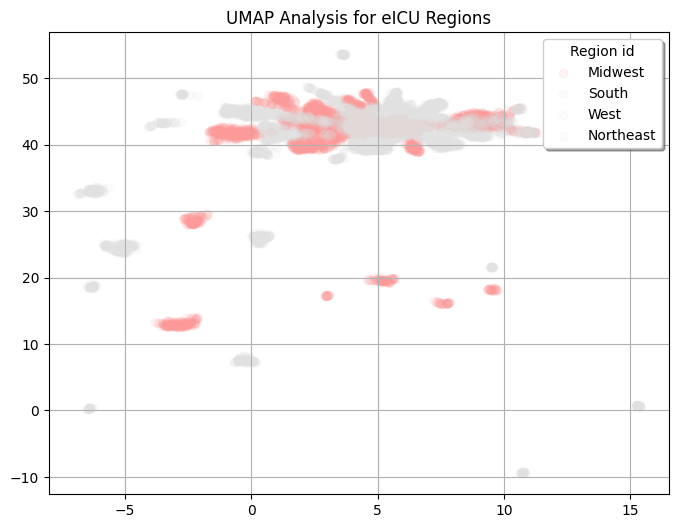

array([[ 5.58499432, 19.90758705,  0.        ],
       [ 8.24330997, 42.94395065,  1.        ],
       [ 3.94508505, 45.5528717 ,  1.        ],
       ...,
       [ 2.80272794, 43.50525284,  2.        ],
       [ 4.33669567, 40.20885086,  2.        ],
       [ 2.92588639, 47.60097122,  2.        ]])

In [22]:
draw_umap(15, 0.5, 0)

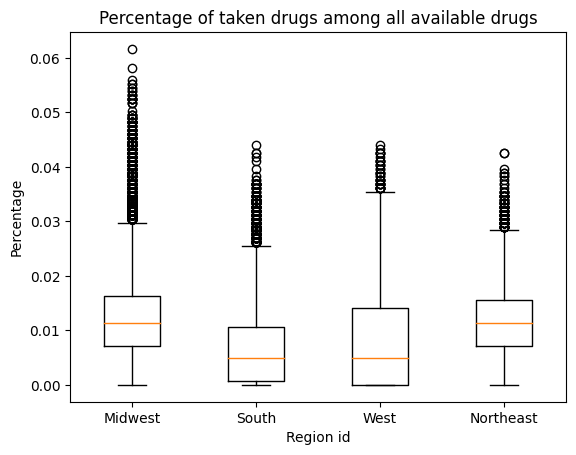

In [23]:
drug_taken_data = []
for region_id in eicu.regionid.unique():
    region_data = eicu[eicu['regionid'] == region_id]
    drugs = region_data.iloc[:, 16:].to_numpy()
    drugs_taken = np.sum(drugs, axis=1)
    total_drugs = drugs.shape[1]
    drugs_taken_percent = drugs_taken / total_drugs
    drug_taken_data.append(drugs_taken_percent)

plt.title("Percentage of taken drugs among all available drugs")
plt.boxplot(drug_taken_data)
plt.xlabel("Region id")
plt.ylabel("Percentage")
plt.xticks(np.arange(len(region_labels)) + 1, region_labels)
plt.show()

## Age

In [13]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import PowerNorm
# import seaborn as sns

# age_labels = eicu.iloc[:, 7:15].columns
# age_heatmap = np.zeros(shape=(len(age_labels), len(selected_hospitals)))

# hospital_labels = []
# for idx, hospital_id in enumerate(selected_hospitals):

#     hospital_data = eicu[eicu["hospitalid"] == hospital_id]
#     age_data = (hospital_data.iloc[:, 7:15]).to_numpy()
#     total_patients = hospital_data.shape[0]
#     total_age_patients = np.sum(age_data, axis=0)
#     age_proportions = total_age_patients / total_patients
#     age_heatmap[:, idx] = age_proportions

#     hospital_labels.append(int(hospital_id))

# plt.title("Proportion of Patients with Different Ages in Each Hospital")
# ax = sns.heatmap(age_heatmap, cmap="magma", norm=PowerNorm(gamma=0.5))
# ax.set_yticklabels(age_labels, rotation=0)
# ax.set_xticklabels(hospital_labels)
# plt.xlabel("Hospitals")
# plt.ylabel("Age")
# plt.show()

## Gender

In [14]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import PowerNorm
# import seaborn as sns

# gender_labels = ["male", 'female']
# gender_heatmap = np.zeros(shape=(len(gender_labels), len(selected_hospitals)))

# hospital_labels = []
# for idx, hospital_id in enumerate(selected_hospitals):

#     hospital_data = eicu[eicu["hospitalid"] == hospital_id]
#     total_patients = hospital_data.shape[0]

#     gender_data = (hospital_data.iloc[:, 6]).to_numpy()
#     male_data = np.sum(gender_data, axis=0)
#     male_proportion = male_data / total_patients
    
#     print(male_proportion)
#     gender_heatmap[:, idx] = male_proportion
    
#     # total_patients = hospital_data.shape[0]
#     # total_age_patients = np.sum(age_data, axis=0)
#     # age_proportions = total_age_patients / total_patients
#     # age_heatmap[:, idx] = age_proportions

#     hospital_labels.append(int(hospital_id))

# gender_heatmap[1] = 1 - gender_heatmap[0]

# print(gender_heatmap)

# plt.figure(figsize=(5, 3))
# plt.title("Proportion of Patients with Different Genders in Each Hospital")
# ax = sns.heatmap(gender_heatmap, cmap="magma")
# ax.set_yticklabels(gender_labels, rotation=90)
# ax.set_xticklabels(hospital_labels)
# plt.xlabel("Hospitals")
# plt.ylabel("Genders")
# plt.show()